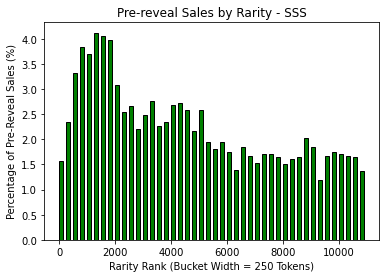

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

COLLECTION_FOLDER = "sss"
COLLECTION_NAME = "SSS"  # For the graph title
TOKENS = 11200
BUCKET_WIDTH = 250
BINS = int(TOKENS / BUCKET_WIDTH)
BAR_WIDTH = 125
PLOT_COLOR = "g"

sales = pd.read_csv(
    "../../{}/data/{}_pre-reveal_sales.csv".format(COLLECTION_FOLDER, COLLECTION_FOLDER)
)
LEN = len(sales)

rarity_dict = {}
total_sales = 0

for i in range(0, BINS):
    lower = i * BUCKET_WIDTH
    upper = (i + 1) * BUCKET_WIDTH

    hist_bin = sales[(sales["RANK"] > lower) & (sales["RANK"] < upper)]
    rarity_dict[lower] = len(hist_bin["PRICE"]) / LEN * 100
    total_sales += hist_bin["PRICE"].sum()


plt.bar(
    rarity_dict.keys(),
    rarity_dict.values(),
    width=BAR_WIDTH,
    color=PLOT_COLOR,
    align="edge",
    edgecolor="black",
)
plt.title("Pre-reveal Sales by Rarity - {}".format(COLLECTION_NAME))
plt.xlabel("Rarity Rank (Bucket Width = {} Tokens)".format(BUCKET_WIDTH), fontsize=10)
plt.ylabel("Percentage of Pre-Reveal Sales (%)", fontsize=10)

plt.savefig(
    "../../{}/figures/{}_price_vs_rank_pre-reveal_hist_pct.png".format(
        COLLECTION_FOLDER, COLLECTION_NAME
    ),
    dpi=300,
)
plt.show()